In [1]:
import pandas as pd


In [2]:
file_name="/Users/filippoboni/data/data_000637.txt.7" 
data=pd.read_csv(file_name,skiprows=0) #loading the file and reading it as a csv file

print(data)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
...       ...   ...          ...         ...         ...       ...
1310715     1     0           62  3869211171         762        14
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764         0
1310718     1     0          139  3869211171         769         0
1310719     1     0           61  3869211171         762        18

[1310720 rows x 6 columns]


## ex 1
Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.



In [3]:
df = pd.DataFrame(data,) #creating a dataframe from the file
df=df[10000:] #eliminiating the first 10000 elements as required
df 

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
10000,1,0,50,3869200267,776,22
10001,1,0,47,3869200267,785,14
10002,1,0,63,3869200267,921,28
10003,1,0,64,3869200267,924,15
10004,1,0,7,3869200267,998,22
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


## ex 2 
Find out the number of BX in a ORBIT (the value 'x').

$Answer:$
In order to find it it's necessary to find the maximum value of the BX_COUNTER and adding  a unit to it. Indeed it permits to update the value of the ORBIT_CNT like when the number of seconds reaches a fixed maximum (60s) it is possible to update the number of minutes when that maximum is overcome and than restar the counting of seconds.

In [4]:
x=df.loc[:,'BX_COUNTER'].max()+1
print(f'the number of BX in a ORBIT is:{x}')

the number of BX in a ORBIT is:3564


## ex 3
Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

$Answer:$ Like when to find how much time something takes during the day at first we need to find the maximmum amount of our, than the maximum amounts of minutes and at the end the maximum amount of seconds subtracting to it the minimum value of that quantities, we need to repeat the same process to calculate how much the data taking lasted. In this case the ORBIT_CNT corresponds to the hour, the BX_COUNTER to the minutes and the TDC_MEAS to the seconds

In [5]:
ORB_MAX=df.loc[:,'ORBIT_CNT'].max() #finding the max value of ORBIT_CNT
print(f'the maximum value of orbits is:{ORB_MAX}')

df_mute_0=df[df['ORBIT_CNT']==ORB_MAX] #considering in the dataframe the datas correspondig to the max value found. This is possible using a copy of the dataframe
df_mute_0

the maximum value of orbits is:3869211171


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310698,1,0,60,3869211171,9,9
1310699,1,0,25,3869211171,11,28
1310700,1,0,28,3869211171,9,26
1310701,1,0,139,3869211171,21,0
1310702,1,0,27,3869211171,18,17
1310703,1,0,25,3869211171,20,13
1310704,1,0,26,3869211171,19,15
1310705,1,0,94,3869211171,43,22
1310706,1,0,28,3869211171,44,29
1310707,1,0,57,3869211171,137,29


In [6]:
BX_MAX=df_mute_0.loc[:,'BX_COUNTER'].max() #finding the max value of BX_COUNTER
print(f'the maximum value of BX is:{BX_MAX}')

df_mute_0=df_mute_0[df_mute_0['BX_COUNTER']==BX_MAX]  #considering in the dataframe the datas correspondig to the max value found. This is possible using a copy of the dataframe
df_mute_0

the maximum value of BX is:769


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310718,1,0,139,3869211171,769,0


In [7]:
TDC_MAX=df_mute_0.loc[:,'TDC_MEAS'].max() #finding the max value of TDC_MEAS
print(f'the maximum value of TDC is:{TDC_MAX}')

df_mute_0=df_mute_0[df_mute_0['TDC_MEAS']==TDC_MAX]  #considering in the dataframe the datas correspondig to the max value found. This is possible using a copy of the dataframe
df_mute_0

the maximum value of TDC is:0


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310718,1,0,139,3869211171,769,0


In [8]:
#The process to find the maximum is repeated to find the minimum
ORB_MIN=df.loc[:,'ORBIT_CNT'].min() 
print(f'the minimum value of ORBITS is:{ORB_MIN}')

df_mute_1=df[df['ORBIT_CNT']==ORB_MIN]
df_mute_1

the minimum value of ORBITS is:3869200267


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
10000,1,0,50,3869200267,776,22
10001,1,0,47,3869200267,785,14
10002,1,0,63,3869200267,921,28
10003,1,0,64,3869200267,924,15
10004,1,0,7,3869200267,998,22
...,...,...,...,...,...,...
10068,1,0,63,3869200267,3293,18
10069,1,1,10,3869200267,3478,10
10070,1,1,12,3869200267,3480,21
10071,1,1,8,3869200267,3488,3


In [9]:
BX_MIN=df_mute_1.loc[:,'BX_COUNTER'].min()
print(f'the minimum value of BX is:{BX_MIN}')


df_mute_1=df_mute_1[df_mute_1['BX_COUNTER']==BX_MIN]
df_mute_1

the minimum value of BX is:776


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
10000,1,0,50,3869200267,776,22


In [10]:
TDC_MIN=df_mute_1.loc[:,'TDC_MEAS'].min()
print(f'the minimum value of ORBITS is:{TDC_MIN}')


df_mute_1=df_mute_1[df_mute_1['TDC_MEAS']==TDC_MIN]
df_mute_1

the minimum value of ORBITS is:22


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
10000,1,0,50,3869200267,776,22


In [11]:
time=ORB_MAX*x*25+BX_MAX*25+TDC_MAX*25/30-(ORB_MIN*x*25+BX_MIN*25+TDC_MIN*25/30) #calculating the time as explainde before and using the converting factors (x,25,25/30)
print(f'the data taking lasts:{time}')

the data taking lasts:971546206.6875


## ex 4
Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [12]:
df['ABSOLUTE TIME']=df['TDC_MEAS']*25/30+df['BX_COUNTER']*25+df['ORBIT_CNT']*x*25 #usinf the converting factors to calculate the required variable 
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE TIME
10000,1,0,50,3869200267,776,22,3.447457e+14
10001,1,0,47,3869200267,785,14,3.447457e+14
10002,1,0,63,3869200267,921,28,3.447457e+14
10003,1,0,64,3869200267,924,15,3.447457e+14
10004,1,0,7,3869200267,998,22,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


## ex 5
Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [13]:
import numpy as np

def rdm(x): #defining the function which when an input is given it reutrn simply a random number that is 0 or 1
    y=np.random.randint(2) #random function
    return y

df['HEAD'] = df.HEAD.apply(rdm) #function applied to the column 'HEAD' of the dataframe. Redefinition of the column 'HEAD'
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE TIME
10000,1,0,50,3869200267,776,22,3.447457e+14
10001,1,0,47,3869200267,785,14,3.447457e+14
10002,0,0,63,3869200267,921,28,3.447457e+14
10003,0,0,64,3869200267,924,15,3.447457e+14
10004,0,0,7,3869200267,998,22,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,0,0,64,3869211171,764,0,3.447467e+14
1310718,0,0,139,3869211171,769,0,3.447467e+14


## ex 6
Create a new DataFrame that contains only the rows with HEAD=1.

In [14]:
s=input('do you want to modify the original datbase(1) or just creating a copy of it with HEAD=1 (2)? (answers:1 or 2) :')

if s=='1':
    
    df=df[df['HEAD']==1] #Filtering the datas that respect the given condition using a mask
    printer=df
    
elif s=='2':
    df_copy=df[df['HEAD']==1] #Filtering the datas that respect the given condition using a mask
    printer=df_copy
    
printer

do you want to modify the original datbase(1) or just creating a copy of it with HEAD=1 (2)? (answers:1 or 2) :1


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE TIME
10000,1,0,50,3869200267,776,22,3.447457e+14
10001,1,0,47,3869200267,785,14,3.447457e+14
10005,1,0,8,3869200267,998,12,3.447457e+14
10008,1,0,61,3869200267,1043,29,3.447457e+14
10009,1,0,59,3869200267,1042,4,3.447457e+14
...,...,...,...,...,...,...,...
1310701,1,0,139,3869211171,21,0,3.447467e+14
1310703,1,0,25,3869211171,20,13,3.447467e+14
1310709,1,1,38,3869211171,417,8,3.447467e+14
1310715,1,0,62,3869211171,762,14,3.447467e+14


## ex 7
Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

In [15]:
import matplotlib.pyplot as plt

df_copy_1=df[df['FPGA']==0]  #Filtering the datas that corresponds to the FPGA 1 using a mask

df_copy_1['uno']=1 #creating a column full of 1
df_copy_2=df_copy_1.groupby(['TDC_CHANNEL']).sum() #for each TDC CHANNEL this comand sums all the other parameters that have the dame channel. In this way the column 'uno' becomes the number of counts a channel appears
df_copy_2



<ipython-input-15-a2c82e898d1d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_1['uno']=1 #creating a column full of 1


,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE TIME,uno
TDC_CHANNEL,,,,,,,
1,601,0,2325392893770,1062014,8635,2.071925e+17,601
2,822,0,3180487566294,1432724,12259,2.833814e+17,822
3,756,0,2925119922711,1391692,10974,2.606282e+17,756
4,1163,0,4499886976426,2061439,16688,4.009399e+17,1163
5,709,0,2743267066179,1247405,10571,2.444251e+17,709
...,...,...,...,...,...,...,...
129,1,0,3869203882,2835,19,3.447461e+14,1
130,17,0,65776508169,25205,241,5.860687e+15,17
137,15,0,58038100818,26596,123,5.171195e+15,15


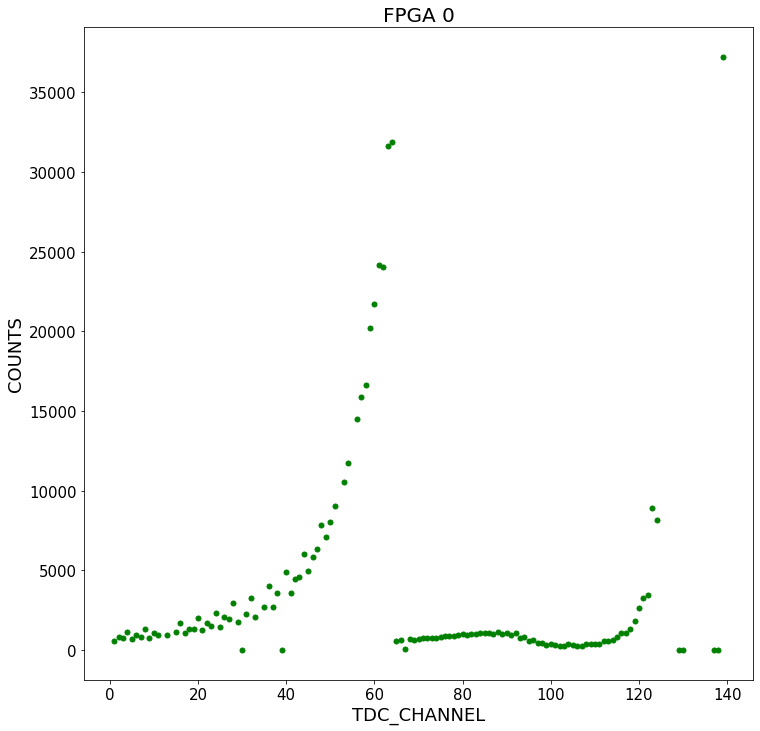

In [16]:
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

ax.plot(df_copy_2.index,df_copy_2['uno'], 'g.', markersize=10) #plotting the required quantities
                                                               #df_copy_2.index=the various tdc channels
                                                               #df_copy_2['uno']=number of counts
ax.set_xlabel('TDC_CHANNEL', fontsize=18)
ax.set_ylabel('COUNTS', fontsize=18)
ax.set_title('FPGA 0', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

In [17]:
df_copy_1=df[df['FPGA']==1]  #Filtering the datas that corresponds to the FPGA 1 using a mask

#repeting the same process of before
df_copy_1['uno']=1
df_copy_2=df_copy_1.groupby(['TDC_CHANNEL']).sum()
df_copy_2


<ipython-input-17-4706bb33b5ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_1['uno']=1


,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE TIME,uno
TDC_CHANNEL,,,,,,,
1,14085,14085,54497770097826,25293804,205068,4.855751e+18,14085
2,16102,16102,62301959425887,28745147,232355,5.551105e+18,16102
3,10878,10878,42089225572902,19503117,158228,3.750150e+18,10878
4,13134,13134,50818155171344,23462585,190857,4.527898e+18,13134
5,7349,7349,28434797333335,12924506,107188,2.533540e+18,7349
...,...,...,...,...,...,...,...
129,15,15,58038096469,26190,263,5.171194e+15,15
130,17,17,65776504118,37632,232,5.860687e+15,17
137,18,18,69645707879,34247,252,6.205433e+15,18


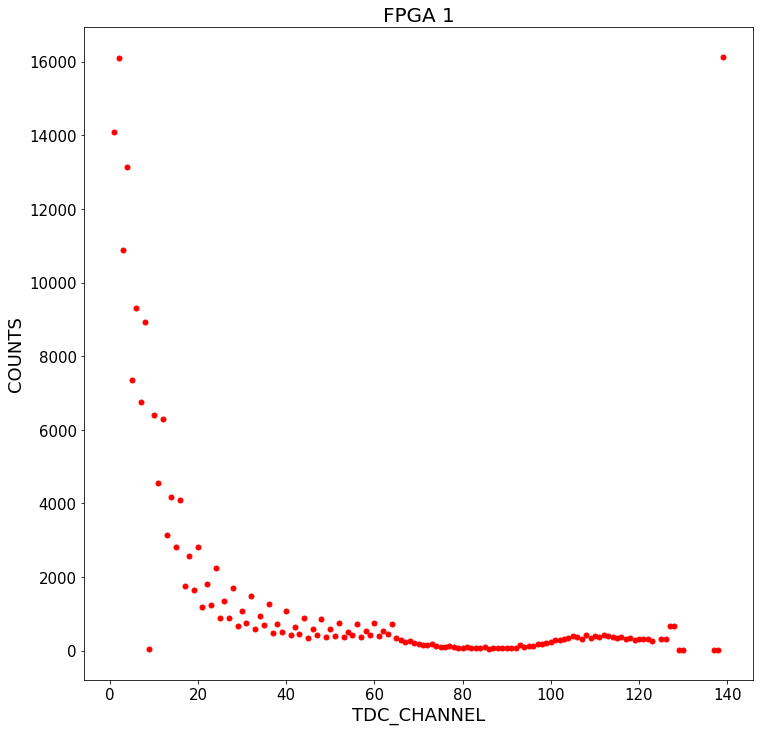

In [18]:
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

ax.plot(df_copy_2.index,df_copy_2['uno'], 'r.', markersize=10) #plotting the required quantities

ax.set_xlabel('TDC_CHANNEL', fontsize=18)
ax.set_ylabel('COUNTS', fontsize=18)
ax.set_title('FPGA 1', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

## ex 8
Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [19]:
df_copy=df #creating a copy of the original dataframe
df_copy['uno']=1 #creating a column full of 1
df_copy


<ipython-input-19-c9c3c2318510>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['uno']=1 #creating a column full of 1


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE TIME,uno
10000,1,0,50,3869200267,776,22,3.447457e+14,1
10001,1,0,47,3869200267,785,14,3.447457e+14,1
10005,1,0,8,3869200267,998,12,3.447457e+14,1
10008,1,0,61,3869200267,1043,29,3.447457e+14,1
10009,1,0,59,3869200267,1042,4,3.447457e+14,1
...,...,...,...,...,...,...,...,...
1310701,1,0,139,3869211171,21,0,3.447467e+14,1
1310703,1,0,25,3869211171,20,13,3.447467e+14,1
1310709,1,1,38,3869211171,417,8,3.447467e+14,1
1310715,1,0,62,3869211171,762,14,3.447467e+14,1


In [20]:
df_copy=df.groupby(['TDC_CHANNEL']).sum() #for each TDC CHANNEL this comand sums all the other parameters that have the dame channel. In this way the column 'uno' becomes the number of counts a channel appears
df_copy

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE TIME,uno
TDC_CHANNEL,,,,,,,
1,14686,14085,56823162991596,26355818,213703,5.062944e+18,14686
2,16924,16102,65482446992181,30177871,244614,5.834486e+18,16924
3,11634,10878,45014345495613,20894809,169202,4.010778e+18,11634
4,14297,13134,55318042147770,25524024,207545,4.928838e+18,14297
5,8058,7349,31178064399514,14171911,117759,2.777966e+18,8058
...,...,...,...,...,...,...,...
129,16,15,61907300351,29025,282,5.515940e+15,16
130,34,17,131553012287,62837,473,1.172137e+16,34
137,33,18,127683808697,60843,375,1.137663e+16,33


In [21]:
Max=df_copy.uno.max() #finding the max of the counts
i=df_copy[df_copy.uno==Max].index #finding the corresponding index
print(f'the channel with more counts is {i[0]} with {Max} counts')
df_copy=df_copy.drop(i) #dropping the channel with maximum number of counts

Max=df_copy.uno.max() #finding the max of the counts
i=df_copy[df_copy.uno==Max].index #finding the corresponding index
print(f'the channel with more counts is {i[0]} with {Max} counts')
df_copy=df_copy.drop(i) #dropping the channel with maximum number of counts

Max=df_copy.uno.max() #finding the max of the counts
i=df_copy[df_copy.uno==Max].index #finding the corresponding indexx
print(f'the channel with more counts is {i[0]} with {Max} counts')


the channel with more counts is 139 with 53338 counts
the channel with more counts is 64 with 32635 counts
the channel with more counts is 63 with 32094 counts


## ex 9
Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [22]:
df_mute_3=df.groupby(['ORBIT_CNT']).ORBIT_CNT.apply(np.unique) #applying a function to the dataframe column 'ORBIT_CNT' which return the unique values 
df_mute_3

ORBIT_CNT
3869200267    [3869200267]
3869200268    [3869200268]
3869200269    [3869200269]
3869200270    [3869200270]
3869200271    [3869200271]
                  ...     
3869211167    [3869211167]
3869211168    [3869211168]
3869211169    [3869211169]
3869211170    [3869211170]
3869211171    [3869211171]
Name: ORBIT_CNT, Length: 10897, dtype: object

In [23]:
print(f'the counts of the unique ORBIT_CNT values are:{len(df_mute_3)}') 

the counts of the unique ORBIT_CNT values are:10897


In [24]:
df_mute_4=df[df['TDC_CHANNEL']==139] #repeting the process of the previous task but filtering the dataframe
df_mute_4

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE TIME,uno
10010,1,0,139,3869200267,1045,0,3.447457e+14,1
10012,1,0,139,3869200267,1389,0,3.447457e+14,1
10028,1,0,139,3869200267,1838,0,3.447457e+14,1
10045,1,0,139,3869200267,2825,0,3.447457e+14,1
10063,1,0,139,3869200267,2871,0,3.447457e+14,1
...,...,...,...,...,...,...,...,...
1310629,1,0,139,3869211170,2487,0,3.447467e+14,1
1310650,1,1,139,3869211170,2959,0,3.447467e+14,1
1310660,1,0,139,3869211170,3027,0,3.447467e+14,1
1310685,1,0,139,3869211170,3230,0,3.447467e+14,1


In [25]:
df_mute_4=df_mute_4.groupby(['ORBIT_CNT']).ORBIT_CNT.apply(np.unique)
df_mute_4

ORBIT_CNT
3869200267    [3869200267]
3869200268    [3869200268]
3869200269    [3869200269]
3869200270    [3869200270]
3869200271    [3869200271]
                  ...     
3869211167    [3869211167]
3869211168    [3869211168]
3869211169    [3869211169]
3869211170    [3869211170]
3869211171    [3869211171]
Name: ORBIT_CNT, Length: 10713, dtype: object

In [26]:
print(f'the counts of the unique ORBIT_CNT values with TDC_CHANNEL=139 are:{len(df_mute_3)}')

the counts of the unique ORBIT_CNT values with TDC_CHANNEL=139 are:10897
